# MiniProject 1

In [1]:
# in this project, I'm going to answer the following questions:

# 1. Compute the total number of shots in each movie category, 
# plot the number of the five types of movies with the most shots over time, 
# and calculate the total average score of these five genres. 

# 2. Calculate the total output of films produced by Universal Pictures, Columbia Pictures, 
# Warner Bros., and Paramount Pictures, and compare the profits of adapted and non-adapted films.


In [2]:
# import the packages will use

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [4]:
# import data

In [5]:
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [6]:
print('shape of df1:', df1.shape, ', shape of df2:', df2.shape)

shape of df1: (4803, 4) , shape of df2: (4803, 20)


In [7]:
# check if they have the same keys for join
print((df1['movie_id'] == df2['id']).describe())

count     4803
unique       1
top       True
freq      4803
dtype: object


In [8]:
# join two dataframe

In [9]:
# firstly rename the 'movie_id' column in df1 as 'id'
df1 = df1.rename(columns={'movie_id':'id'})

# then use merge function to join these two dataframe
movies_df = pd.merge(df1, df2, on = 'id')

In [10]:
# overview of dataframe

In [11]:
movies_df.columns

Index(['id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')

In [12]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

----

## data preprocessing

In [13]:
# see if there are duplicates values
print((movies_df['original_title'] == movies_df['title_y']).describe())

count     4803
unique       2
top       True
freq      4542
dtype: object


In [14]:
# due to some movies are produced in countries other than United States, the original names of them are not in English
# and I decide to drop 'original_title' column and focus on their English title

In [15]:
# see if there are duplicates values
print((movies_df['title_x'] == movies_df['title_y']).describe())
# drop one of them

count     4803
unique       1
top       True
freq      4803
dtype: object


In [16]:
# additionally, I find the columns 'id', 'cast', 'crew', 'homepage', 'original_language', 'spoken_languages',
# 'runtime', 'overview' and 'tagline' are not related to my questions, so I will drop it either.

m_df = movies_df.drop(['original_title', 'title_x', 'id', 'cast', 'crew', 'homepage', 
                       'original_language', 'runtime', 'spoken_languages','overview', 'tagline'], axis=1)
m_df = m_df.rename(columns = {'title_y':'title'})
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   keywords              4803 non-null   object 
 3   popularity            4803 non-null   float64
 4   production_companies  4803 non-null   object 
 5   production_countries  4803 non-null   object 
 6   release_date          4802 non-null   object 
 7   revenue               4803 non-null   int64  
 8   status                4803 non-null   object 
 9   title                 4803 non-null   object 
 10  vote_average          4803 non-null   float64
 11  vote_count            4803 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 487.8+ KB


In [17]:
# handle the null value of 'release_date'
m_df.loc[m_df['release_date'].isnull(), :] 

,budget,genres,keywords,popularity,production_companies,production_countries,release_date,revenue,status,title,vote_average,vote_count
4553,0,[],[],0.0,[],[],NaN,0,Released,America Is Still the Place,0.0,0


In [18]:
# drop this row
m_df = m_df.dropna()
m_df.head()

,budget,genres,keywords,popularity,production_companies,production_countries,release_date,revenue,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,Released,John Carter,6.1,2124


In [19]:
# tackle the json data: 'genres', 'keywords', 'production_companies', and 'production_countries'
col = ['genres', 'keywords', 'production_companies', 'production_countries']
for i in col:
    # apply() for dataframe
    m_df[i] = m_df[i].apply(json.loads)

In [20]:
m_df['genres'].head(1)

0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
Name: genres, dtype: object

In [21]:
# collect names
def c_n(x):
    return ','.join([y['name'] for y in x])

In [22]:
m_df['genres'] = m_df['genres'].apply(c_n)
m_df['keywords'] = m_df['keywords'].apply(c_n)
m_df['production_companies'] = m_df['production_companies'].apply(c_n)
m_df['production_countries'] = m_df['production_countries'].apply(c_n)

In [23]:
m_df.head()

,budget,genres,keywords,popularity,production_companies,production_countries,release_date,revenue,status,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,Released,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,Released,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,Released,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,Released,John Carter,6.1,2124


In [24]:
# change the data type of 'release_date'
m_df.loc[:, 'release_date'] = m_df.loc[:, 'release_date'].astype('datetime64[ns]')

In [25]:
# add a 'year' column
m_df['year'] = m_df['release_date'].dt.year
# m_df['year']

In [26]:
# check
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4802 non-null   int64         
 1   genres                4802 non-null   object        
 2   keywords              4802 non-null   object        
 3   popularity            4802 non-null   float64       
 4   production_companies  4802 non-null   object        
 5   production_countries  4802 non-null   object        
 6   release_date          4802 non-null   datetime64[ns]
 7   revenue               4802 non-null   int64         
 8   status                4802 non-null   object        
 9   title                 4802 non-null   object        
 10  vote_average          4802 non-null   float64       
 11  vote_count            4802 non-null   int64         
 12  year                  4802 non-null   int64         
dtypes: datetime64[ns](

----

## question 1

In [27]:
# 1. Compute the total number of shots in each movie category, 
# plot the number of the five types of movies with the most shots over time, 
# and calculate the total average score of these five genres. 

In [28]:
q1 = m_df[['year', 'genres', 'vote_average']]
q1

,year,genres,vote_average
0,2009,"Action,Adventure,Fantasy,Science Fiction",7.2
1,2007,"Adventure,Fantasy,Action",6.9
2,2015,"Action,Adventure,Crime",6.3
3,2012,"Action,Crime,Drama,Thriller",7.6
4,2012,"Action,Adventure,Science Fiction",6.1
...,...,...,...
4798,1992,"Action,Crime,Thriller",6.6
4799,2011,"Comedy,Romance",5.9
4800,2013,"Comedy,Drama,Romance,TV Movie",7.0
4801,2012,,5.7


In [29]:
# collect the genres
test = [i for i in q1['genres'].str.split(',')]
test2 = []
for i in test:
    test2 = test2 + i
genres = list(set(test2))
genres.remove('')
genres

['War',
 'Mystery',
 'Thriller',
 'Documentary',
 'Western',
 'Crime',
 'Comedy',
 'Fantasy',
 'Music',
 'Drama',
 'Family',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Animation',
 'Action',
 'Foreign',
 'Horror',
 'Adventure',
 'History']

In [30]:
q1_df = q1
for i in genres:
    q1_df[i] = q1_df['genres'].str.contains(i).apply(lambda x: 1 if x else 0)
display(q1_df.head(), q1_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             4802 non-null   int64  
 1   genres           4802 non-null   object 
 2   vote_average     4802 non-null   float64
 3   War              4802 non-null   int64  
 4   Mystery          4802 non-null   int64  
 5   Thriller         4802 non-null   int64  
 6   Documentary      4802 non-null   int64  
 7   Western          4802 non-null   int64  
 8   Crime            4802 non-null   int64  
 9   Comedy           4802 non-null   int64  
 10  Fantasy          4802 non-null   int64  
 11  Music            4802 non-null   int64  
 12  Drama            4802 non-null   int64  
 13  Family           4802 non-null   int64  
 14  Romance          4802 non-null   int64  
 15  Science Fiction  4802 non-null   int64  
 16  TV Movie         4802 non-null   int64  
 17  Animation     

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,genres,vote_average,War,Mystery,Thriller,Documentary,Western,Crime,Comedy,...,Family,Romance,Science Fiction,TV Movie,Animation,Action,Foreign,Horror,Adventure,History
0,2009,"Action,Adventure,Fantasy,Science Fiction",7.2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,2007,"Adventure,Fantasy,Action",6.9,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2015,"Action,Adventure,Crime",6.3,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,2012,"Action,Crime,Drama,Thriller",7.6,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2012,"Action,Adventure,Science Fiction",6.1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


None

In [31]:
# number of various types of movies each year
q1_1 = q1_df.drop(['genres', 'vote_average'], axis=1)
q1_1 = q1_1.groupby('year').sum()
q1_1

,War,Mystery,Thriller,Documentary,Western,Crime,Comedy,Fantasy,Music,Drama,Family,Romance,Science Fiction,TV Movie,Animation,Action,Foreign,Horror,Adventure,History
year,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1925,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1927,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1929,0,0,1,0,0,0,0,0,1,2,0,2,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,3,5,53,10,1,37,71,21,12,110,22,25,27,2,17,56,0,25,36,8
2014,10,15,66,7,3,27,62,16,9,110,23,24,26,0,14,54,0,21,37,7
2015,2,20,67,7,7,26,52,10,8,95,17,23,28,0,13,46,0,33,35,9


In [32]:
# find the top 5 genres
genres_sort = q1_1.sum(axis = 0).sort_values(ascending = False)
genres_sort


Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
dtype: int64

In [33]:
# so I will pick 'Drama', 'Comedy', 'Thriller', 'Action', and 'Romance' to do the further exploring
new_genres = genres_sort[['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']]
new_genres

Drama       2297
Comedy      1722
Thriller    1274
Action      1154
Romance      894
dtype: int64

In [34]:
# visualization
vis1 = q1_1[['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']]
vis1

,Drama,Comedy,Thriller,Action,Romance
year,,,,,
1916,1,0,0,0,0
1925,1,0,0,0,1
1927,1,0,0,0,0
1929,2,0,1,0,2
1930,1,0,0,1,0
...,...,...,...,...,...
2013,110,71,53,56,25
2014,110,62,66,54,24
2015,95,52,67,46,23


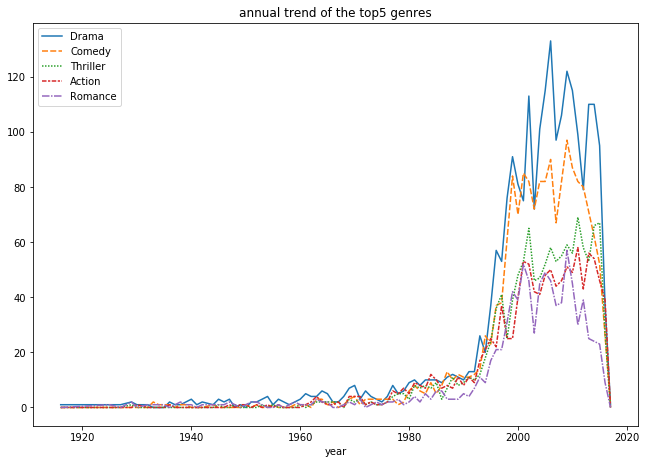

In [35]:
sns.lineplot(data = vis1) # .set(xlim = (1916, 2017))

plt.title('annual trend of the top5 genres')
plt.subplots_adjust(left = 0.1,right = 1.5, bottom = 0.1, top = 1.5, wspace = 1, hspace = 1)

In [36]:
# this step I am going to compute the average vote of each genre
q1_2 = q1_df
for i in genres:
    q1_2[i] = q1_df[i] * q1_df['vote_average']

q1_2 = q1_2.drop(['genres', 'vote_average'], axis=1)
q1_2 = q1_2.groupby('year').sum()
q1_2

,War,Mystery,Thriller,Documentary,Western,Crime,Comedy,Fantasy,Music,Drama,Family,Romance,Science Fiction,TV Movie,Animation,Action,Foreign,Horror,Adventure,History
year,,,,,,,,,,,,,,,,,,,,
1916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1929,0.0,0.0,7.6,0.0,0.0,0.0,0.0,0.0,5.0,12.6,0.0,12.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1,0.0,0.0,0.0,0.0,0.0,6.1,0.0,0.0,0.0,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,17.3,31.2,314.1,64.0,5.9,228.8,431.2,124.9,80.1,700.1,132.3,163.5,169.0,10.8,107.5,338.5,0.0,130.2,224.1,56.2
2014,67.9,81.6,363.6,24.7,15.4,155.6,368.6,103.7,56.2,652.4,141.6,150.5,158.3,0.0,85.1,316.3,0.0,103.2,234.4,44.0
2015,14.5,110.1,364.8,24.8,36.3,140.9,312.9,64.2,45.5,569.4,100.3,146.1,162.6,0.0,84.2,261.5,0.0,164.5,219.4,59.1


In [37]:
genres_vote = q1_2[['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']].sum(axis = 0)
genres_vote

Drama       14674.6
Comedy      10238.3
Thriller     7658.0
Action       6911.9
Romance      5549.7
dtype: float64

In [38]:
# the average vote of these 5 genres
display(genres_vote/new_genres)

Drama       6.388594
Comedy      5.945587
Thriller    6.010989
Action      5.989515
Romance     6.207718
dtype: float64

----

## question 2

In [39]:
# 2. Calculate the total output of films produced by Universal Pictures, Columbia Pictures, 
# Warner Bros., and Paramount Pictures, and compare the profits of adapted and non-adapted films.

In [40]:
q2_df = m_df[['production_companies', 'keywords', 'budget', 'revenue']]
q2_df

,production_companies,keywords,budget,revenue
0,"Ingenious Film Partners,Twentieth Century Fox ...","culture clash,future,space war,space colony,so...",237000000,2787965087
1,"Walt Disney Pictures,Jerry Bruckheimer Films,S...","ocean,drug abuse,exotic island,east india trad...",300000000,961000000
2,"Columbia Pictures,Danjaq,B24","spy,based on novel,secret agent,sequel,mi6,bri...",245000000,880674609
3,"Legendary Pictures,Warner Bros.,DC Entertainme...","dc comics,crime fighter,terrorist,secret ident...",250000000,1084939099
4,Walt Disney Pictures,"based on novel,mars,medallion,space travel,pri...",260000000,284139100
...,...,...,...,...
4798,Columbia Pictures,"united states–mexico barrier,legs,arms,paper k...",220000,2040920
4799,,,9000,0
4800,"Front Street Pictures,Muse Entertainment Enter...","date,love at first sight,narration,investigati...",0,0
4801,,,0,0


In [41]:
# find the movie adapted from novel
q2_df['based on novel'] = q2_df['keywords'].str.contains('based on novel').apply(lambda x: 1 if x else 0)

q2_df = q2_df.drop(['keywords'], axis = 1)
q2_df

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,production_companies,budget,revenue,based on novel
0,"Ingenious Film Partners,Twentieth Century Fox ...",237000000,2787965087,0
1,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",300000000,961000000,0
2,"Columbia Pictures,Danjaq,B24",245000000,880674609,1
3,"Legendary Pictures,Warner Bros.,DC Entertainme...",250000000,1084939099,0
4,Walt Disney Pictures,260000000,284139100,1
...,...,...,...,...
4798,Columbia Pictures,220000,2040920,0
4799,,9000,0,0
4800,"Front Street Pictures,Muse Entertainment Enter...",0,0,0
4801,,0,0,0


In [42]:
# find the movies produced by these 4 companies
com_lst = ['Universal Pictures', 'Columbia Pictures', 'Warner Bros.', 'Paramount Pictures']
for i in com_lst:
    q2_df[i] = q2_df['production_companies'].str.contains(i).apply(lambda x: 1 if x else 0)
q2_df = q2_df.drop(['production_companies'], axis = 1)
q2_df

,budget,revenue,based on novel,Universal Pictures,Columbia Pictures,Warner Bros.,Paramount Pictures
0,237000000,2787965087,0,0,0,0,0
1,300000000,961000000,0,0,0,0,0
2,245000000,880674609,1,0,1,0,0
3,250000000,1084939099,0,0,0,1,0
4,260000000,284139100,1,0,0,0,0
...,...,...,...,...,...,...,...
4798,220000,2040920,0,0,1,0,0
4799,9000,0,0,0,0,0,0
4800,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0


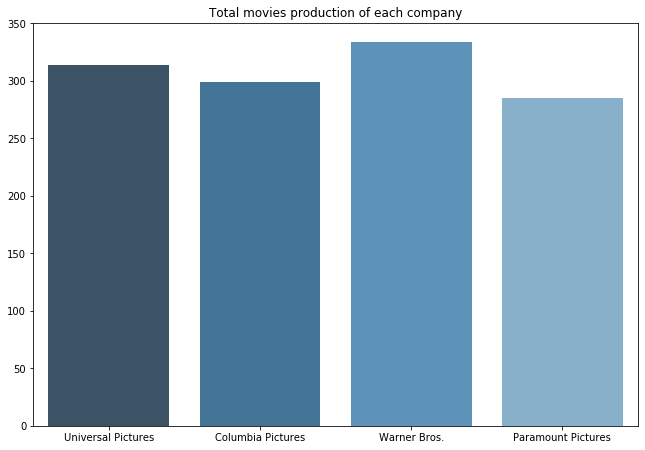

In [43]:
# Total movie production of the four companies
v2 = q2_df[['Universal Pictures', 'Columbia Pictures', 'Warner Bros.', 'Paramount Pictures']]
sns.barplot(data = v2, estimator = sum, ci = 0, palette = 'Blues_d')

plt.title('Total movies production of each company')
plt.subplots_adjust(left = 0.1,right = 1.5, bottom = 0.1, top = 1.5, wspace = 1, hspace = 1)

In [44]:
v2[['Universal Pictures', 'Columbia Pictures', 'Warner Bros.', 'Paramount Pictures']].sum(axis = 0)

Universal Pictures    314
Columbia Pictures     299
Warner Bros.          334
Paramount Pictures    285
dtype: int64

In [45]:
# Comparing the profitability of adapted films with non-adapted films
q2_df['profit'] = q2_df['revenue'] - q2_df['budget']
q2_df

,budget,revenue,based on novel,Universal Pictures,Columbia Pictures,Warner Bros.,Paramount Pictures,profit
0,237000000,2787965087,0,0,0,0,0,2550965087
1,300000000,961000000,0,0,0,0,0,661000000
2,245000000,880674609,1,0,1,0,0,635674609
3,250000000,1084939099,0,0,0,1,0,834939099
4,260000000,284139100,1,0,0,0,0,24139100
...,...,...,...,...,...,...,...,...
4798,220000,2040920,0,0,1,0,0,1820920
4799,9000,0,0,0,0,0,0,-9000
4800,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0


In [46]:
q2_2 = q2_df.drop(['budget', 'revenue'], axis = 1)
q2_2

,based on novel,Universal Pictures,Columbia Pictures,Warner Bros.,Paramount Pictures,profit
0,0,0,0,0,0,2550965087
1,0,0,0,0,0,661000000
2,1,0,1,0,0,635674609
3,0,0,0,1,0,834939099
4,1,0,0,0,0,24139100
...,...,...,...,...,...,...
4798,0,0,1,0,0,1820920
4799,0,0,0,0,0,-9000
4800,0,0,0,0,0,0
4801,0,0,0,0,0,0


In [47]:
# handle the whitespace
q2_2 = q2_2.rename(columns={'based on novel':'based_on_novel', 'Universal Pictures':'Universal_Pictures',
                         'Columbia Pictures':'Columbia_Pictures', 'Warner Bros.':'Warner_Bros',
                         'Paramount Pictures':'Paramount_Pictures'})

In [48]:
# Universal Pictures

In [49]:
print(q2_2.query("(based_on_novel == 1) & (Universal_Pictures == 1)")[['profit']].sum(axis = 0))
print('--------------------')
print('number of movies based on novel:', len(q2_2.query("(based_on_novel == 1) & (Universal_Pictures == 1)")[['based_on_novel']]))

profit    920423828
dtype: int64
--------------------
number of movies based on novel: 9


In [50]:
print(q2_2.query("(based_on_novel == 0) & (Universal_Pictures == 1)")[['profit']].sum(axis = 0))
print('--------------------')
print('number of movies not based on novel:', len(q2_2.query("(based_on_novel == 0) & (Universal_Pictures == 1)")[['based_on_novel']]))

profit    28069924768
dtype: int64
--------------------
number of movies not based on novel: 305


In [51]:
# Columbia Pictures

In [52]:
print(q2_2.query("(based_on_novel == 1) & (Columbia_Pictures == 1)")[['profit']].sum(axis = 0))
print('--------------------')
print('number of movies based on novel:', len(q2_2.query("(based_on_novel == 1) & (Columbia_Pictures == 1)")[['based_on_novel']]))

profit    2223450867
dtype: int64
--------------------
number of movies based on novel: 15


In [53]:
print(q2_2.query("(based_on_novel == 0) & (Columbia_Pictures == 1)")[['profit']].sum(axis = 0))
print('--------------------')
print('number of movies not based on novel:', len(q2_2.query("(based_on_novel == 0) & (Columbia_Pictures == 1)")[['based_on_novel']]))

profit    20559873778
dtype: int64
--------------------
number of movies not based on novel: 284


In [54]:
# Warner Bros.

In [55]:
print(q2_2.query("(based_on_novel == 1) & (Warner_Bros == 1)")[['profit']].sum(axis = 0))
print('--------------------')
print('number of movies based on novel:', len(q2_2.query("(based_on_novel == 1) & (Warner_Bros == 1)")[['based_on_novel']]))

profit    1110535922
dtype: int64
--------------------
number of movies based on novel: 17


In [56]:
print(q2_2.query("(based_on_novel == 0) & (Warner_Bros == 1)")[['profit']].sum(axis = 0))
print('--------------------')
print('number of movies not based on novel:', len(q2_2.query("(based_on_novel == 0) & (Warner_Bros == 1)")[['based_on_novel']]))

profit    32052201795
dtype: int64
--------------------
number of movies not based on novel: 317


In [57]:
# Paramount Pictures

In [58]:
print(q2_2.query("(based_on_novel == 1) & (Paramount_Pictures == 1)")[['profit']].sum(axis = 0))
print('--------------------')
print('number of movies based on novel:', len(q2_2.query("(based_on_novel == 1) & (Paramount_Pictures == 1)")[['based_on_novel']]))

profit    1325626259
dtype: int64
--------------------
number of movies based on novel: 13


In [59]:
print(q2_2.query("(based_on_novel == 0) & (Paramount_Pictures == 1)")[['profit']].sum(axis = 0))
print('--------------------')
print('number of movies not based on novel:', len(q2_2.query("(based_on_novel == 0) & (Paramount_Pictures == 1)")[['based_on_novel']]))

profit    26243283899
dtype: int64
--------------------
number of movies not based on novel: 272
